# Making better scientific figures

### Content

 1. Introduction
 2. Learning goals of this notebook
 3. A better figure
 4. Step-by-step example using matplotlib

## 1. Introduction

This is the first notebook of this online course and it serves several purposes. The notebook provides some hands-on tips and tricks on how to create a reasonable figure that you could put into a thesis and use in the slides of an oral presentation as well. The absolute **minimum requirement** for a figure is that the axes are labelled and that these labels are readable.

Ideally, the figures you make are not only suitable for your thesis and oral presentation, but can also be used as a figure in a journal publication and/or international conferences. This requires a **good figure** and takes a lot of time, practice and communication with scientific co-workers and supervisor. Taste and personal style are certainly a factor, and a 'best figure' does not exist. *This guide also contains choices made by the author that depend on personal preferences.*

Usually making a good figure takes a lot of time, practice and discussion with scientific co-workers including your supervisor. You should expect that you end up tuning the many options of a plot package, e.g. matplotlib, because the defaults settings produce a figure that can handle a very wide range of figures reasonably well. As a result, a specific figures can often be improved significantly by going away from the default settings. The goal of this notebook is simply to illustrate how you could make a **better figure**.

## 2. Learning goals of this notebook

1. Learn how to tune some of the important basic settings using matplotlib in Python
2. Understand how these basic settings can affect interpretation of your results
3. Produce a figure that satisfies some minimum requirements 
4. Identify several ways to make better figures

## 3. A better figure

Let's start with a working definition of what we believe is a good figure

### **A good figure is a figure that gets the message accross to a target audience without misleading that audience**

To adhere to this most important basic rule there are a few things one should take into consideration. A small investment in the beginning of your project may save a lot of work later on.

#### 1. Make sure that the font size is readable

Make sure that the fonts and labels on the figure are readable. Most physics journals have a two-column format with ~90 mm wide columns and a text font that is 10 pt in size. Assuming you make your figure 90 mm wide to cover one column you should not make fonts and labels smaller than 10 pt. Too large fonts (more than 14 pt for a 90 mm wide figure) will look awkward and you use valuable figure space for labels instead of data.

#### 2. The figure should have sufficient resolution

Make sure that the final result has sufficient resolution so that the text and datapoints are not pixelated. Typically journals request a 600 dpi resolution or better for figures with lines and points. To avoid this issue altogether one could prefer vector formats (e.g. svg) over raster formats (e.g. bmp, jpg) see https://en.wikipedia.org/wiki/Vector_graphics. 

#### 3. Use multiple ways (color, shape, linestyle) to distinguish different datasets

Some people are color blind or your figure may be converted to grayscale to put it into print without the use of color. Another classic is a projector that produces strange colours during an oral presentation. Try to use multiple styles to distinguish the different data / curves. For instance vary both the color and the shape of the symbol by using green open squares and red solid circles and a blue dashed line and purple solid line. This also saves a lot of work of remaking the figure when writing the text. You can now refer to a particular set of data using for instance 'the solid symbols', or the 'dashed lines'. For more info on how to design good figures for color blind people see: https://jfly.uni-koeln.de/color/

#### 4. All axes should have a title

In physics, we usually plot one quantity as a function of another. Hence your axes should always have titles and should be more descriptive than 'x' and 'y'. Often the quantities we plot have units as well. Make the style of your titles consistent. For instance if you plot the current through the sample as a function of the applied voltage the titles on the axis could be 'Applied voltage (mV)' and 'Current (nA)'. I have chosen to use capitals for the title and I put the units in round brackets. 

#### 5. Keep it simple. Less is more

Keep your figures simple by limiting the number of curves in one plot and by limiting the number of labels on the axes. If the measured voltages are in the milliVolt range it is better to put a few numbers on the axis like '0, 2, 4 and 6' instead of sticking to units of Volt and label '0.000, 0.002, 0.004, 0.006'. In some cases you will see that matplotlab adds a label 'x1e-3' or '+2.013e-6' to an axis. This should be avoided at all times.

#### 6. A good figure comes with a caption

Alltough this is not covered here, good captions are equally important. Ideally, the figures and captions should be enough for an expert audience to understand the outcome of your research. A good caption starts with a first line that explains  what the figure is about, i.e. the main message. If needed you can add one or two sentences explaining the result in more detail. 

## 4. Step-by-step example using matplotlib

The example below illustrates a few steps towards a better figure. The data in the example is computer generated and highlights a few typical problems. We assume that the experiment measured a voltage accross some device (resistor) as a function of applied current. 

In addition to some issues with plotting these data the hypothetical dataset also seems to suffer from a poorly designed experiment with a rather strange range of applied currents. Depending on the way we plot these data this flaw is less or more apparent.

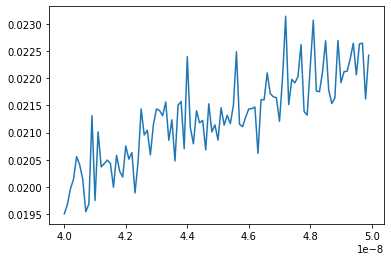

In [1]:
# import the required libraries  
import random  
import matplotlib.pyplot as plt  

# Enable inline plotting
%matplotlib inline

# store some fake data in a list 
# These data could be measured voltage (y) as a function of 
# current through the device
x = [] # current in A
y = [] # voltage in V
mu = 10
sigma = 0.5
    
for i in range(100):  
    tempx = (i+400)*1E-10
    tempy = 0.01+(0.025*i+random.gauss(mu, sigma))*1E-3
    x.append(tempx)  
    y.append(tempy)  
        
# plotting a graph  
plt.plot(x,y)
plt.show() 

### Step 1 - improving the axes

Notice the absence of labels on the x-axis and y-axis. 

The horizontal axis has a somewhat obscure and possibly ambiguous 1e-8 label on the horizontal axis. We can improve by converting the x-axis values to nA instead of A. 

The vertical axis uses 5 digits for the labels. Convenient units on the vertical axis seem to be mV. 

A consequence of this choice is that a straight line through the origin with an apparent slope '1' corresponds to a resistance $R = V/I$ of 1 M$\Omega$.

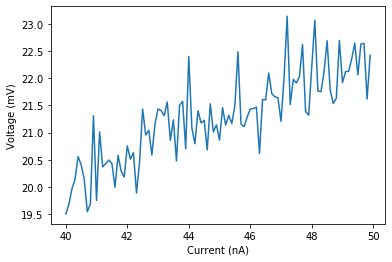

In [2]:
import numpy as np

# We use numpy to convert the x and y lists to numpy arrays so that we can multiply the entire list 
# by a constant easily

plt.plot(1E9*np.array(x),1E3*np.array(y))
plt.xlabel('Current (nA)')
plt.ylabel('Voltage (mV)')
plt.show() 

#### Step 2 - Set the font and size of the labels

Standard settings are not optimal, but not too bad either. 

In this step I put a serif font on the axes to get the font closer to the font used in most scientific texts. This is a personal choice. 

I find the figure in the Jupyter notebook too small to work with, so I am going to make everything 2 times larger. To do this I introduce some code to change the basic settings of all figures by introducing standard sizes that I then scale by a factor two. 

I am also replacing the line by datapoints, anticipating a linear fit through the data. (see https://matplotlib.org/api/markers_api.html )

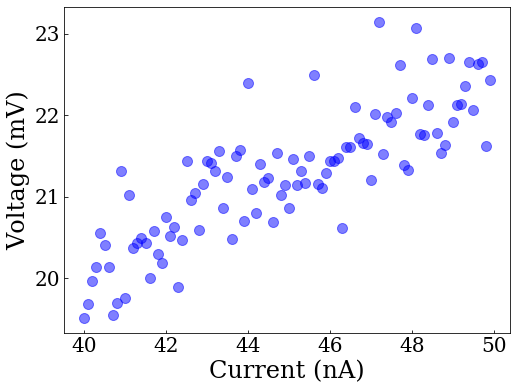

In [3]:
# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

# Plotting command

plt.plot(1E9*np.array(x),1E3*np.array(y), marker='o', ls='none', markersize=10, alpha=0.5, color='blue')
plt.xlabel('Current (nA)')
plt.ylabel('Voltage (mV)')
plt.show() 


**Step 3 - Add a fit to the data**

The data in the figure are noisy, but they seem linear. Let's try to emphasize this by adding a fit to a straight line.

a =  0.2334509434492329 +/- 0.015784769221457703
b =  10.788179702388007 +/- 0.7109868998454525


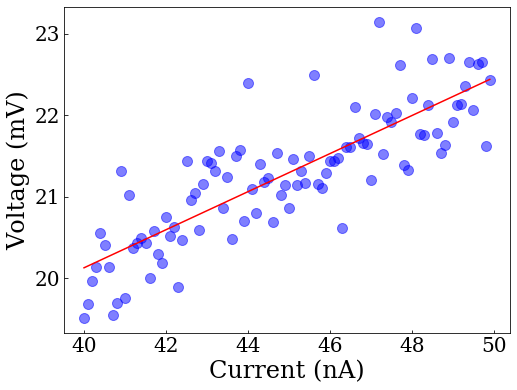

In [4]:
# Import some basic routine for curve fitting
from scipy.optimize import curve_fit

# Define a function that will fit to the data. In our case a straight line 
def linear(x, a, b):
    "Linear fit function y=a*x + b"
    return (a*x + b)

# The actual fit, fit parameters and error bar
popt, pcov = curve_fit(linear,1E9*np.array(x),1E3*np.array(y))

print("a = ", popt[0], "+/-", pcov[0,0]**0.5)
print("b = ", popt[1], "+/-", pcov[1,1]**0.5)

plt.plot(1E9*np.array(x),1E3*np.array(y), marker='o', ls='none', markersize=10, alpha=0.5, color='blue')
plt.plot(1E9*np.array(x), linear(1E9*np.array(x), popt[0],popt[1]), ls='solid', color='red')
plt.xlabel('Current (nA)')
plt.ylabel('Voltage (mV)')
plt.show() 

**Step 4 - This figure could be misleading!**

The problem with the above figure is that it does not contain the origin. It is thus very difficult to see if the straight line fit through the data goes through the origin or not. If this is a simply resistor we would expect the straight line to go through the origin. Fitting the straight line through the data in the above figure emphasizes this linear relation, but obscures the fact that this line does not go through the origin. 

Without an origin in your plot statements like 'proportional to', 'twice as large' etc. are more difficult to verify by the reader. Worse, it may put you onto the wrong track to interpret your data. 

I am including the origin in the plot and also fix the number of labels on the x- and y-axis to make the figure less busy. We do not need much more than 4 or 5 labels.

**If this would be a real experiment I would highly recommend measuring at currents below 40 nA and perhaps check what happens if one inverts the direction of the current.**

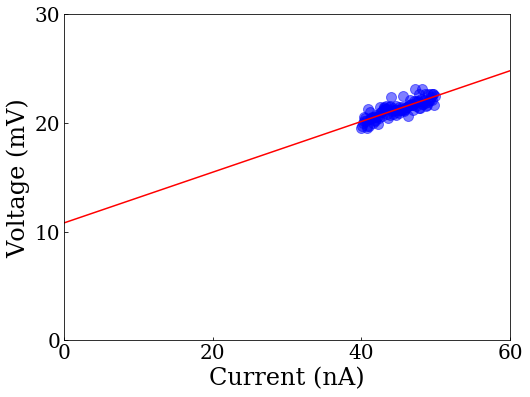

In [5]:
x2=np.linspace(0,60,50)

plt.plot(1E9*np.array(x),1E3*np.array(y), marker='o', ls='none', markersize=10, alpha=0.5, color='blue')
plt.plot(x2, linear(x2, popt[0],popt[1]), ls='solid', color='red')
plt.xlabel('Current (nA)')
plt.xticks((0,20,40,60))
plt.xlim(0,60)
plt.ylabel('Voltage (mV)')
plt.yticks((0,10,20,30))
plt.ylim(0,30)
plt.show() 

**Step 5 - Create a file that you can use later**

We use the matplotlib savefig option to create a file that can be used. If you like you can try this yourself. We create a vector format (pdf) that will take about 12 kB and an acceptable rasterized image at 600 dpi (jpg) that is considerably larger, about 521 kB.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig

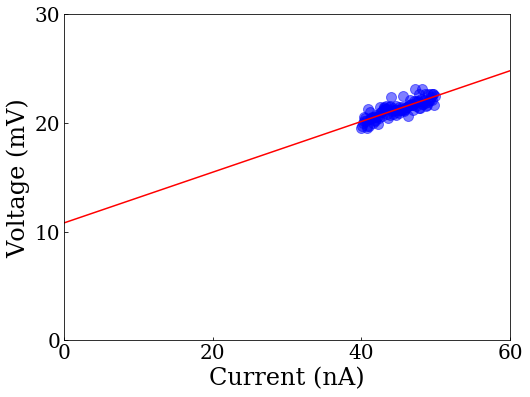

In [6]:
# First we need to create the figure again becuase we ended with a plt.show command

plt.plot(1E9*np.array(x),1E3*np.array(y), marker='o', ls='none', markersize=10, alpha=0.5, color='blue')
plt.plot(x2, linear(x2, popt[0],popt[1]), ls='solid', color='red')
plt.xlabel('Current (nA)')
plt.xticks((0,20,40,60))
plt.xlim(0,60)
plt.ylabel('Voltage (mV)')
plt.yticks((0,10,20,30))
plt.ylim(0,30)

# The bbox_inches='tight' option removes the whitespace around the image if there is any

plt.savefig('foo.pdf', bbox_inches='tight')           # pdf is a vector format, works well for line graphs 
plt.savefig('foo.jpg', bbox_inches='tight', dpi=600)  # rasterized format at 600 dpi

plt.show() 